In [93]:
# Packages
import json
import pandas as pd
import tarfile
import matplotlib.pyplot as plt
import numpy as np
import datetime
import tqdm

In [9]:
# Data import
red_city = "Tampa"
blue_city = "Philadelphia"

business_full = pd.read_json("yelp_academic_dataset_business.json", lines=True, engine="pyarrow")
print(business_full['city'].value_counts())
red_business = business_full[business_full['city'] == red_city]["business_id"].values
blue_business = business_full[business_full['city'] == blue_city]["business_id"].values
business = business_full[business_full['city'].isin([red_city, blue_city])]


try:
    checkins = pd.read_json("yelp_academic_dataset_checkin.json", lines=True, engine="pyarrow")
    print(checkins.columns.tolist())
    reviews = pd.read_json("yelp_academic_dataset_review.json", lines=True,engine = "pyarrow")
    print(reviews.columns.tolist())
    if 'business_id' not in reviews.columns:
        raise KeyError("Column 'business_id' not found in review data.")
    reviews = reviews[reviews['business_id'].isin((red_business.tolist() + blue_business.tolist()))]
    checkins = checkins[checkins['business_id'].isin((red_business.tolist() + blue_business.tolist()))]
except Exception as e:
    # Fallback: Load a sample to debug
    reviews = pd.read_json("yelp_academic_dataset_review.json", lines=True, nrows=10)
    print("Error loading data:", e)

print("number of reviews: ", len(reviews))
print("number of checkins: ", len(checkins))

reviews.loc[reviews['business_id'].isin(red_business), 'city'] = red_city
reviews.loc[reviews['business_id'].isin(blue_business), 'city'] = blue_city
reviews['date'] = pd.to_datetime(reviews['date'])


checkins.loc[checkins['business_id'].isin(red_business), 'city'] = red_city
checkins.loc[checkins['business_id'].isin(blue_business), 'city'] = blue_city   


checkins['date_list'] = None
checkins['date_list'] = checkins['date'].apply(lambda x: [datetime.datetime.strptime(date.strip(), "%Y-%m-%d %H:%M:%S") 
                                                         for date in x.split(',')])


city
Philadelphia      14569
Tucson             9250
Tampa              9050
Indianapolis       7540
Nashville          6971
                  ...  
Gentilly              1
pennsauken            1
Hamiltion             1
Newtown square        1
Apollo beach          1
Name: count, Length: 1416, dtype: int64
['business_id', 'date']
['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']
number of reviews:  1422441
number of checkins:  20897


In [ ]:
print(business_full['city'] == 'St. Petersburg')

['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours']


In [58]:
import pickle

# Import pickle data
file = 'restaurants.pkl'
with open(file, 'rb') as f:
    restaurants = pickle.load(f)

file = 'restaurant_reviews.pkl'
with open(file, 'rb') as f:
    reviews = pickle.load(f)

# Check the data
print("Number of restaurants: ", len(restaurants))
print("Number of reviews: ", len(reviews))

/var/folders/vp/9n7gmff94b5ctkj5gylfcdnm0000gn/T/ipykernel_84786/1193193488.py:6: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  restaurants = pickle.load(f)
/var/folders/vp/9n7gmff94b5ctkj5gylfcdnm0000gn/T/ipykernel_84786/1193193488.py:10: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world 

Number of restaurants:  8857
Number of reviews:  992701


In [94]:
import calplot
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

# Define restriction dates
start_restrictions = datetime.datetime(2020, 3, 16)
end_restrictions_blue = datetime.datetime(2021, 6, 2)
end_restrictions_red = datetime.datetime(2021, 5, 3)

# Get restaurants that are open before and after the restrictions
# Get businesses that are currently open
business_open_after = business[business['is_open'] == 1]
# Ger reviews with date before the restrictions
reviews_before = reviews[reviews['date'] < start_restrictions]
# Get businesses whose business_id is in the reviews before the restrictions
business_open_after = business_open_after[business_open_after['business_id'].isin(reviews_before['business_id'])]

# Get closes businesses
business_closed = business[business['is_open'] == 0]
# Get businesses with business_id in the reviews before the restrictions
business_closed = business_closed[business_closed['business_id'].isin(reviews_before['business_id'])]


# Filter by red and blue cities
business_open_after_red = business_open_after[business_open_after['city'] == red_city]
business_open_after_blue = business_open_after[business_open_after['city'] == blue_city]
business_closed_red = business_closed[business_closed['city'] == red_city]
business_closed_blue = business_closed[business_closed['city'] == blue_city]

# Get the number of businesses in each category
print(len(business_open_after_red), len(business_open_after_blue))
print(len(business_closed_red), len(business_closed_blue))

# Get reviews for each category
reviews_open_after_red = reviews[reviews['business_id'].isin(business_open_after_red['business_id'])]
reviews_open_after_blue = reviews[reviews['business_id'].isin(business_open_after_blue['business_id'])]
reviews_closed_red = reviews[reviews['business_id'].isin(business_closed_red['business_id'])]
reviews_closed_blue = reviews[reviews['business_id'].isin(business_closed_blue['business_id'])]

# Subset all reviews to only 2019 onwards
reviews_open_after_red = reviews_open_after_red[reviews_open_after_red['date'] >= '2019-01-01']
reviews_open_after_blue = reviews_open_after_blue[reviews_open_after_blue['date'] >= '2019-01-01']
reviews_closed_red = reviews_closed_red[reviews_closed_red['date'] >= '2019-01-01']
reviews_closed_blue = reviews_closed_blue[reviews_closed_blue['date'] >= '2019-01-01']

# Calplot of reviews
colors_normal = [
    (1.00, 1.00, 0.90),  
    (0.90, 0.97, 0.70),  
    (0.78, 0.94, 0.55),  
    (0.65, 0.90, 0.40),  
    (0.45, 0.80, 0.20),  
    (0.30, 0.70, 0.10),  
    (0.15, 0.50, 0.05),  
    (0.00, 0.00, 0.00),   
]
reviews_indexed = reviews_open_after_red['date'].value_counts().sort_index()
cmap_normal = LinearSegmentedColormap.from_list("custom_YlGn", colors_normal, N=100)
calplot.calplot(reviews_indexed, edgecolor='black', linewidth=0.5, cmap=cmap_normal, suptitle='Number of Reviews')

reviews_indexed = reviews_open_after_blue['date'].value_counts().sort_index()
cmap_normal = LinearSegmentedColormap.from_list("custom_YlGn", colors_normal, N=100)
calplot.calplot(reviews_indexed, edgecolor='black', linewidth=0.5, cmap=cmap_normal, suptitle='Number of Reviews')

reviews_indexed = reviews_closed_red['date'].value_counts().sort_index()
cmap_normal = LinearSegmentedColormap.from_list("custom_YlGn", colors_normal, N=100)
calplot.calplot(reviews_indexed, edgecolor='black', linewidth=0.5, cmap=cmap_normal, suptitle='Number of Reviews')

reviews_indexed = reviews_closed_blue['date'].value_counts().sort_index()
cmap_normal = LinearSegmentedColormap.from_list("custom_YlGn", colors_normal, N=100)
calplot.calplot(reviews_indexed, edgecolor='black', linewidth=0.5, cmap=cmap_normal, suptitle='Number of Reviews')

NameError: name 'business' is not defined

In [ ]:
# Make categories a list
restaurants['categories'] = restaurants['categories'].apply(lambda x: x.split(', '))

In [75]:
print(restaurants.iloc[0]['categories'])

# Get restaurants for which categories includes 'Fast Food'
restaurants_fast_food = restaurants[restaurants['categories'].apply(lambda x: 'Fast Food' in x)]

print("Number of fast food restaurants: ", len(restaurants_fast_food))
print("Attributes: ", restaurants['attributes'].iloc[0])

['Restaurants', 'Food', 'Bubble Tea', 'Coffee & Tea', 'Bakeries']
Number of fast food restaurants:  710
Attributes:  {'ByAppointmentOnly': 'False', 'BusinessAcceptsCreditCards': 'False', 'BikeParking': 'True', 'RestaurantsPriceRange2': '1', 'CoatCheck': None, 'RestaurantsTakeOut': 'True', 'RestaurantsDelivery': 'False', 'Caters': 'True', 'WiFi': "u'free'", 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}", 'WheelchairAccessible': None, 'HappyHour': None, 'OutdoorSeating': 'False', 'HasTV': None, 'RestaurantsReservations': None, 'DogsAllowed': None, 'Alcohol': "u'none'", 'GoodForKids': None, 'RestaurantsAttire': None, 'Ambience': None, 'RestaurantsTableService': None, 'RestaurantsGoodForGroups': None, 'DriveThru': None, 'NoiseLevel': None, 'GoodForMeal': None, 'BusinessAcceptsBitcoin': None, 'Smoking': None, 'Music': None, 'GoodForDancing': None, 'AcceptsInsurance': None, 'BestNights': None, 'BYOB': None, 'Corkage': None, 'BYOBCorka

In [79]:
import pandas as pd

# Convert review date to datetime
reviews['date'] = pd.to_datetime(reviews['date'])

# Define time periods
pre_covid = reviews[reviews['date'] < '2020-03-01']
during_covid = reviews[(reviews['date'] >= '2020-03-01') & (reviews['date'] <= '2021-06-30')]
post_covid = reviews[reviews['date'] > '2021-06-30']

# Define the required parent categories
required_categories = {"Restaurants", "Food"}

# Filter businesses that have at least one of the required categories
restaurants_filtered = restaurants[restaurants['categories'].apply(
    lambda cats: isinstance(cats, list) and any(cat in required_categories for cat in cats)
)]

# Explode categories after filtering
restaurants_exploded = restaurants_filtered.explode('categories')

# Function to count reviews per category for a given period
def count_reviews_by_period(reviews_period, label):
    merged = reviews_period.merge(restaurants_exploded[['business_id', 'categories']], on='business_id')
    return merged.groupby('categories').size().rename(label)

# Count reviews for each period
pre = count_reviews_by_period(pre_covid, 'pre')
during = count_reviews_by_period(during_covid, 'during')
post = count_reviews_by_period(post_covid, 'post')

# Combine into one DataFrame
combined = pd.concat([pre, during, post], axis=1).fillna(0)

# Filter categories with more than 100 total reviews
combined['total'] = combined[['pre', 'during', 'post']].sum(axis=1)
combined = combined[combined['total'] > 100]

# Normalize by total reviews in each period
combined['pre_norm'] = combined['pre'] / len(pre_covid)
combined['during_norm'] = combined['during'] / len(during_covid)
combined['post_norm'] = combined['post'] / len(post_covid)

# Calculate relative growth
combined['post_vs_pre'] = (combined['post_norm'] - combined['pre_norm']) / combined['pre_norm']
combined['during_vs_pre'] = (combined['during_norm'] - combined['pre_norm']) / combined['pre_norm']

# Sort and display
combined = combined.sort_values(by='post_vs_pre', ascending=False)
print(combined)


                       pre  during   post   total  pre_norm  during_norm  \
categories                                                                 
Sicilian              23.0   158.0   90.0   271.0  0.000026     0.002010   
Himalayan/Nepalese    69.0    76.0   38.0   183.0  0.000079     0.000967   
Adult                 57.0    40.0   31.0   128.0  0.000065     0.000509   
Japanese Curry       166.0   130.0   74.0   370.0  0.000190     0.001654   
New Mexican Cuisine  631.0   430.0  217.0  1278.0  0.000721     0.005469   
...                    ...     ...    ...     ...       ...          ...   
Egyptian             155.0     0.0    0.0   155.0  0.000177     0.000000   
Festivals            104.0    11.0    0.0   115.0  0.000119     0.000140   
Ukrainian            364.0     1.0    0.0   365.0  0.000416     0.000013   
Apartments           583.0     4.0    0.0   587.0  0.000666     0.000051   
Resorts              124.0     0.0    0.0   124.0  0.000142     0.000000   

           

In [90]:
import pandas as pd
from datetime import datetime
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, Legend
from bokeh.palettes import Category10

# Assume restaurants['categories'] are already lists, so we extract the first cuisine
# Explode the categories so each business has one row per category
restaurants_exploded = restaurants.explode('categories')
restaurants_exploded = restaurants_exploded.rename(columns={'categories': 'cuisine'})

# Merge with reviews so each review appears once for each of its business's categories
cuisine_reviews = reviews.merge(restaurants_exploded[['business_id', 'cuisine']], on='business_id')


# Merge cuisine info into reviews
cuisine_reviews = reviews.merge(restaurants[['business_id', 'cuisine']], on='business_id')

# Filter reviews after Jan 2019
cuisine_reviews = cuisine_reviews[cuisine_reviews['date'] >= datetime(2019, 1, 1)]

# Exclude broad categories and get top 10
top_cuisines = (cuisine_reviews[~cuisine_reviews['cuisine'].isin(['Restaurants', 'Food', 'Nightlife'])]
                .groupby('cuisine')
                .size()
                .sort_values(ascending=False)
                .head(10)
                .index
                .tolist())

# Add 'month' column
cuisine_reviews['month'] = cuisine_reviews['date'].dt.to_period('M').astype(str)

# Group by month and cuisine
monthly_counts = (cuisine_reviews[cuisine_reviews['cuisine'].isin(top_cuisines)]
                  .groupby(['month', 'cuisine'])
                  .size()
                  .reset_index(name='review_count'))

# Get total monthly review counts (for standardization)
monthly_totals = (cuisine_reviews.groupby('month')
                  .size()
                  .reset_index(name='total_reviews'))

# Merge to get total per month
monthly_counts = monthly_counts.merge(monthly_totals, on='month')

# Standardize review count
monthly_counts['standardized_review_count'] = monthly_counts['review_count'] / monthly_counts['total_reviews']

# Prepare Bokeh plot
p = figure(x_range=sorted(monthly_counts['month'].unique()), 
           height=400, title="Standardized Monthly Reviews by Cuisine Type",
           toolbar_location=None, tools="")

colors = Category10[len(top_cuisines)]
bar = {}
legend_items = []

for i, cuisine in enumerate(top_cuisines):
    cuisine_data = monthly_counts[monthly_counts['cuisine'] == cuisine]
    source = ColumnDataSource(cuisine_data)
    bar[cuisine] = p.vbar(x='month', top='standardized_review_count', source=source,
                          color=colors[i], width=0.8, alpha=0.8, muted_alpha=0, muted=False)
    legend_items.append((cuisine, [bar[cuisine]]))

legend = Legend(items=legend_items, location="center", title="Cuisine Type")
legend.click_policy = "mute"
legend.orientation = "vertical"
p.add_layout(legend, 'right')

p.width = 1200
p.xaxis.major_label_orientation = 1.2
p.xaxis.axis_label = "Month"
p.yaxis.axis_label = "Proportion of Monthly Reviews"

output_notebook()
show(p)


Loading BokehJS ...

In [83]:
print("Restaurants with Burger category: ", len(restaurants[restaurants['categories'].apply(lambda x: 'Burgers' in x)]))

Restaurants with Burger category:  648


In [67]:
import pandas as pd
from datetime import datetime
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, Legend
from bokeh.palettes import Category10

# Ensure the 'date' column is in datetime format
reviews['date'] = pd.to_datetime(reviews['date'])

# Define categories to exclude ('Restaurants' and 'Food')
excluded_categories = {'Restaurants', 'Food'}

# Function to explode categories into separate rows, excluding 'Restaurants' and 'Food'
def filter_and_explode_categories(categories):
    if isinstance(categories, list):
        valid_categories = [category for category in categories if category not in excluded_categories]
        return valid_categories
    return []

# Apply the function to explode categories for each restaurant
restaurants['cuisines'] = restaurants['categories'].apply(filter_and_explode_categories)

# Explode the list into separate rows, repeating the 'business_id' for each category
restaurants_exploded = restaurants.explode('cuisines')

# Merge exploded cuisines info into reviews
cuisine_reviews = reviews.merge(restaurants_exploded[['business_id', 'cuisines']], on='business_id')

# Filter reviews after Jan 2019
cuisine_reviews = cuisine_reviews[cuisine_reviews['date'] >= datetime(2019, 1, 1)]

# Get top 10 cuisines (count all categories)
top_cuisines = (cuisine_reviews[cuisine_reviews['cuisines'].notna()]
                .groupby('cuisines')
                .size()
                .sort_values(ascending=False)
                .head(10)
                .index
                .tolist())

# Add 'month' column
cuisine_reviews['month'] = cuisine_reviews['date'].dt.to_period('M').astype(str)

# Group by month and cuisine
monthly_counts = (cuisine_reviews[cuisine_reviews['cuisines'].isin(top_cuisines)]
                  .groupby(['month', 'cuisines'])
                  .size()
                  .reset_index(name='review_count'))

# Get total monthly review counts (for standardization)
monthly_totals = (cuisine_reviews.groupby('month')
                  .size()
                  .reset_index(name='total_reviews'))

# Merge to get total per month
monthly_counts = monthly_counts.merge(monthly_totals, on='month')

# Standardize review count
monthly_counts['standardized_review_count'] = monthly_counts['review_count'] / monthly_counts['total_reviews']

# Prepare Bokeh plot
p = figure(x_range=sorted(monthly_counts['month'].unique()), 
           height=400, title="Standardized Monthly Reviews by Cuisine Type",
           toolbar_location=None, tools="")

colors = Category10[len(top_cuisines)]
bar = {}
legend_items = []

for i, cuisine in enumerate(top_cuisines):
    cuisine_data = monthly_counts[monthly_counts['cuisines'] == cuisine]
    source = ColumnDataSource(cuisine_data)
    bar[cuisine] = p.vbar(x='month', top='standardized_review_count', source=source,
                          color=colors[i], width=0.8, alpha=0.8, muted_alpha=0.0, muted=False)
    legend_items.append((cuisine, [bar[cuisine]]))

legend = Legend(items=legend_items, location="center", title="Cuisine Type")
legend.click_policy = "mute"
legend.orientation = "vertical"
p.add_layout(legend, 'right')

p.width = 1200
p.xaxis.major_label_orientation = 1.2
p.xaxis.axis_label = "Month"
p.yaxis.axis_label = "Proportion of Monthly Reviews"

output_notebook()
show(p)


Loading BokehJS ...

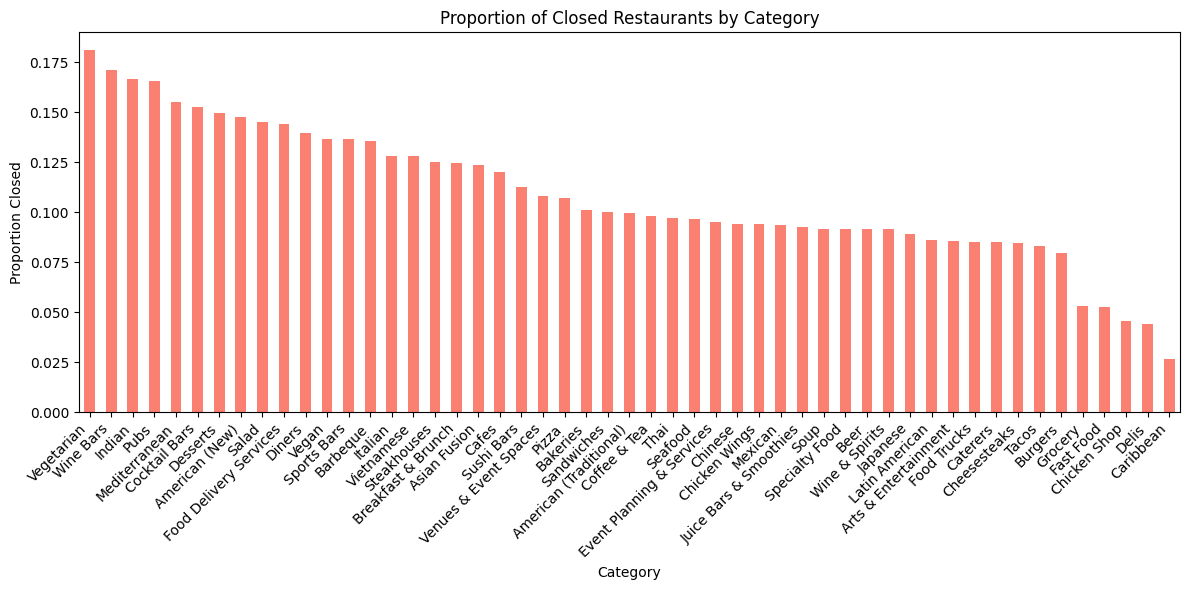

In [105]:
import matplotlib.pyplot as plt

# Get only restaurants with valid category lists
restaurants_valid = restaurants[restaurants['categories'].apply(lambda x: isinstance(x, list))]

# Filter for restaurants with at least one review in 2020
reviewed_in_2020 = reviews[reviews['date'] >= '2020-01-01']['business_id'].unique()
restaurants_valid = restaurants_valid[restaurants_valid['business_id'].isin(reviewed_in_2020)]

# Explode categories
exploded = restaurants_valid.explode('categories')

# Count total number of restaurants per category
total_counts = exploded.groupby('categories')['business_id'].nunique()

# Count closed restaurants per category
closed = exploded[exploded['is_open'] == 0]
closed_counts = closed.groupby('categories')['business_id'].nunique()

# Calculate proportion closed
proportion_closed = (closed_counts / total_counts).dropna()

# Filter out low-count categories (optional, e.g., fewer than 25 businesses total)
proportion_closed = proportion_closed[total_counts[proportion_closed.index] > 100]

# Exclude overly broad categories
exclude = {'Restaurants', 'Food', 'Nightlife', 'Bars'}
proportion_closed = proportion_closed[~proportion_closed.index.isin(exclude)]

# Sort and plot
proportion_closed = proportion_closed.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
proportion_closed.plot(kind='bar', color='salmon')
plt.title('Proportion of Closed Restaurants by Category')
plt.xlabel('Category')
plt.ylabel('Proportion Closed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
